## Helper Functions

In [1]:
def show_binary_image(image, title=None, size=(15,12)):
    '''Function to output binary thresholded image using matpltlib'''
    plt.figure(figsize=size)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    if title != None:
        plt.title(title)
    plt.show()
    
def show_image(image, title=None, size=(15,12), cmap = None, axis= False):
    '''Function to show a rgb image'''
    plt.figure(figsize=size)

    if cmap == 'hot':
        plt.imshow(image, cmap='hot')
    elif cmap == 'gray':
            plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    if axis == False:
        plt.axis('off')
    if title != None:
        plt.title(title)
    plt.show()
    

## Load imports
        
            
        
        
            
       

In [2]:
import numpy as np
import cv2
from skimage.feature import hog

from feature_extraction import FeatureExtraction

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
%matplotlib inline

        
            
        
        
            
       

## Read in data

In [3]:
##Read in the training data into matrices

cars = []
non_cars = []
car_paths = glob.glob('../Data/vehicles/*/*.png')
non_car_paths = glob.glob('../Data/non-vehicles/*/*.png')
for path in car_paths:
    cars.append(mpimg.imread(path))
for path in non_car_paths:
    non_cars.append(mpimg.imread(path))
    
cars = np.asarray(cars)
non_cars = np.asarray(non_cars)
    

## Extract Features

In [4]:
car_features = []
non_car_features = []

for car in cars:
    car_features.append(FeatureExtraction(car).get_features())
for non_car in non_cars:
    non_car_features.append(FeatureExtraction(non_car).get_features())

car_features = np.asarray(car_features)
non_car_features = np.asarray(non_car_features)

/home/josh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [ ]:
##Save the extracted features to disk (dataset too large to fit into laptop memory)
#print(car_features.shape)
#print(non_car_features.shape)
#np.savez_compressed('../Data/Extracted_features', car_features = car_features, non_car_features = non_car_features)

## Create Training and  Test Data set

In [ ]:
##Load the extracted features from disk
#loaded = np.load('../Data/Extracted_features.npz')
#car_features = loaded['car_features']
#non_car_features = loaded['non_car_features']

In [6]:
# Combine and preprocess the training data set

from sklearn.preprocessing import StandardScaler
#note: train test split does both the shuffle and the split of the data
from sklearn.model_selection import train_test_split

X = np.vstack((car_features, non_car_features)).astype(np.float64)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))

rand_state = np.random.randint(0,100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_scaler = StandardScaler().fit(X_train)

#Normalise the datasets seperate to avoid any lookahead bias entering the data
scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)



## Train Linear SVM

In [7]:
from sklearn import grid_search
from sklearn.svm import LinearSVC


parameters = {'C':np.logspace(-6, -2, 10)}

svc = LinearSVC()
clf = grid_search.GridSearchCV(svc, parameters)
clf.fit(scaled_X_train, y_train)


/home/josh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/josh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-06,   2.78256e-06,   7.74264e-06,   2.15443e-05,
         5.99484e-05,   1.66810e-04,   4.64159e-04,   1.29155e-03,
         3.59381e-03,   1.00000e-02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [9]:
print(clf.best_params_)
print('Test Accuracy of SVM = ', clf.score(scaled_X_test, y_test))

{'C': 0.0012915496650148827}
Test Accuracy of SVM =  0.986768018018


### Save Model

In [ ]:
import pickle
#Save model to disk
filename= '../Models/linear_svm.sav'
pickle.dump(svc, open(filename, 'wb'))
#Save data normalisation routine
filename = '../Models/X_scaler.sav'
pickle.dump(X_scaler, open(filename, 'wb'))

### Load Model

In [ ]:
import pickle

filename = '../Models/linear_svm.sav'
clf = pickle.load(open(filename, 'rb'))
#print('Test Accuracy of SVM = ', svc.score(scaled_X_test, y_test))

filename = '../Models/X_scaler.sav'
X_scaler = pickle.load(open(filename, 'rb'))

## VechicleDetection

In [10]:
from vehicle_detection import VehicleDetection



/home/josh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


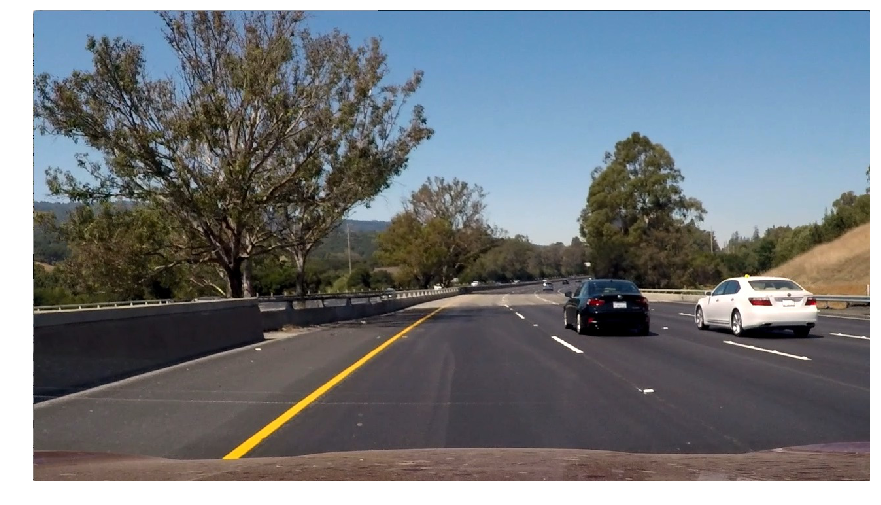

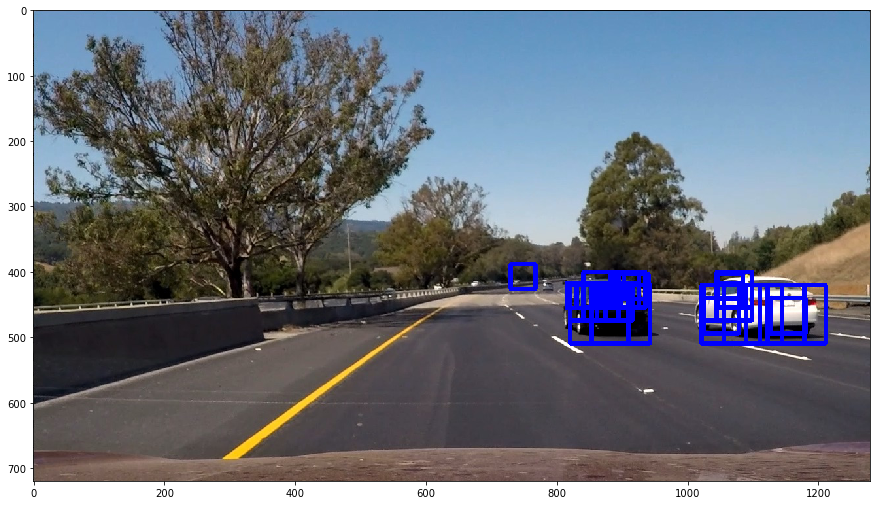

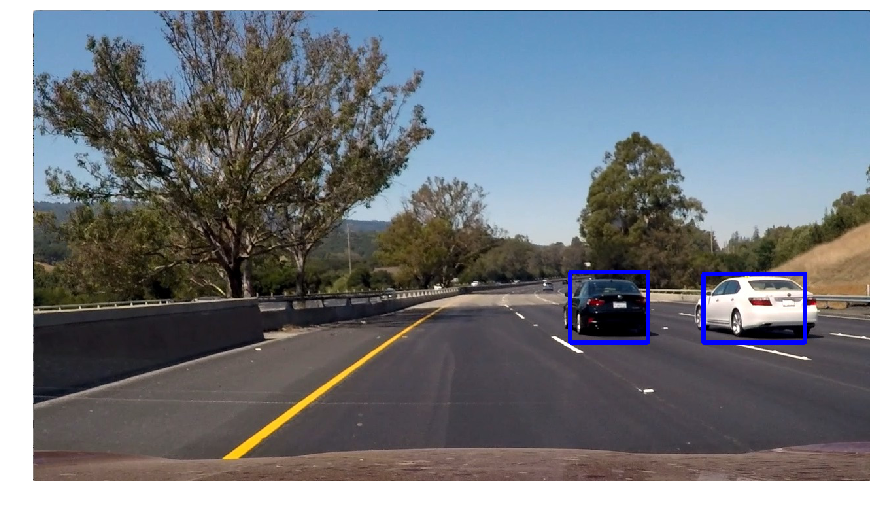

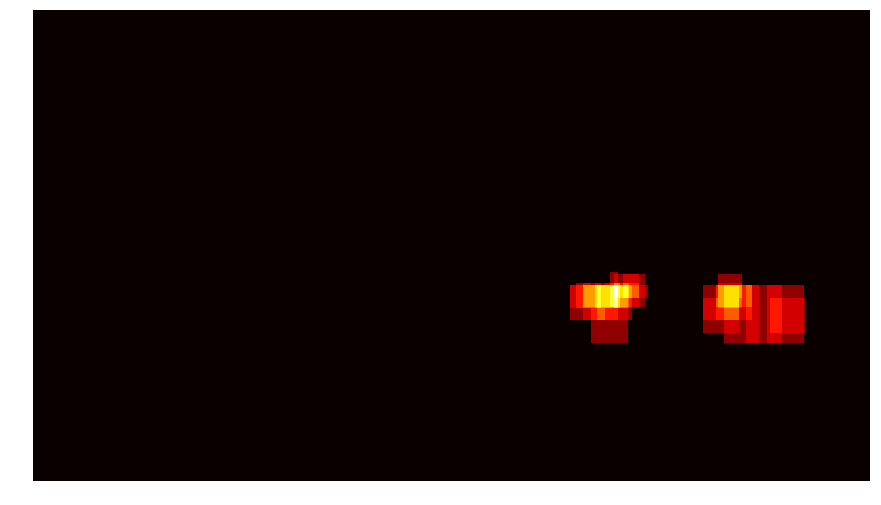

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
%matplotlib inline

test_image = mpimg.imread('../test_images/test6.jpg')

detector = VehicleDetection(X_scaler, clf, test_image)

detected_img, heatmap, windows = detector.detect_vehicles(test_image, is_heatmap=True)


show_image(test_image)
show_image(windows, axis=True)
show_image(detected_img)
show_image(heatmap, cmap='hot')




## Apply to video data

In [12]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [13]:
test_image = mpimg.imread('../test_images/test6.jpg')
detector = VehicleDetection(X_scaler, clf, test_image)

video_output = '../output_videos/project_video.mp4'
clip1 = VideoFileClip('../project_video.mp4')

white_clip = clip1.fl_image(detector.detect_vehicles)
%time white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video ../output_videos/project_video.mp4
[MoviePy] Writing video ../output_videos/project_video.mp4


100%|█████████▉| 1260/1261 [22:15<00:01,  1.05s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../output_videos/project_video.mp4 

CPU times: user 1h 22min 15s, sys: 31.1 s, total: 1h 22min 46s
Wall time: 22min 16s
